In [9]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import pyccl as ccl
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [10]:
font = {'size'   : 16}#, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# plt.rcParams["figure.figsize"] = [8.0,6.0]

In [12]:
import classy_sz
classy_sz.__version__

'v2.9.4'

In [13]:
# import classy
# classy.__version__

note that ccl seems to break with the latest class version. I had to switch to class v2.9.4

In [14]:
import pyccl
pyccl.__version__

'2.5.2.dev14+g0708c592'

In [61]:
%%time
cosmology = {
'h' : 0.6774,
'Omega_b' : 0.04860,
'Omega_cdm' : 0.315-0.04860,
'A_s': 2e-9,
'n_s' : 0.9667,
# this takes ages:
# 'N_ncdm': 1,
# # 'N_ur': 2.0328,
# 'm_ncdm': 0.0

}

M = Class()
M.set(cosmology)
M.set({'output':"mPk"})
M.compute()
print(M.get_current_derived_parameters(['Neff']))
print(M.get_current_derived_parameters(['sigma8']))

{'Neff': 3.046000000000001}
{'sigma8': 0.8143634852740608}
CPU times: user 1.72 s, sys: 4.98 ms, total: 1.72 s
Wall time: 353 ms


In [33]:
%%time
cosmo = ccl.Cosmology(
    Omega_c=cosmology['Omega_cdm'], 
    Omega_b=cosmology['Omega_b'],
    h=cosmology['h'], 
    A_s = cosmology['A_s'],
    n_s=cosmology['n_s'],
    m_nu=0,
    m_nu_type='normal',
    Neff=M.get_current_derived_parameters(['Neff'])['Neff'],   
    transfer_function='boltzmann_class',
                     )

print(ccl.sigma8(cosmo))
hmd_200c = ccl.halos.MassDef200c()
hmd_200m = ccl.halos.MassDef200m()

0.8146662402674019
CPU times: user 1.59 s, sys: 7.43 ms, total: 1.59 s
Wall time: 491 ms


In [34]:
cosmo.cosmo

<pyccl.ccllib.cosmology; proxy of <Swig Object of type 'struct ccl_cosmology *' at 0x1640a64b0> >

In [40]:
%%time
# cosmology = {


M = Class()
M.set(cosmology)
M.set({
'output':'dndlnM',
# 'output':'mPk',
    
"P_k_max_1/Mpc": 50.,   
# "z_max_pk": 1./0.01-1.,

"non linear": "none",
    
'mass function':'T08',

'M_min':1e11,
'M_max':1e15,
# 'mass_epsrel': 1e-8,
# 'mass_epsabs': 1e-60,
    
'z_min':0.,
'z_max': 6.,
    
# 'hm_consistency' : 0,
# 'ndim_redshifts': 200,
# 'ndim_masses': 200,
# 'class_sz_verbose':10

    
'no_spline_in_tinker' : 1

})


M.compute()

CPU times: user 16.7 s, sys: 43.8 ms, total: 16.8 s
Wall time: 2.73 s


In [41]:
M.get_current_derived_parameters(['Neff'])

{'Neff': 3.0459982214534222}

In [42]:
M.get_sigma_at_z_and_m

<function Class.get_sigma_at_z_and_m>

In [43]:
# TBD: compare with colossus

zp = 5.
Masses = np.geomspace(1e11,1e15,300)
dndm = 1./Masses*np.vectorize(M.get_dndlnM_at_z_and_M)(zp,Masses)

[]

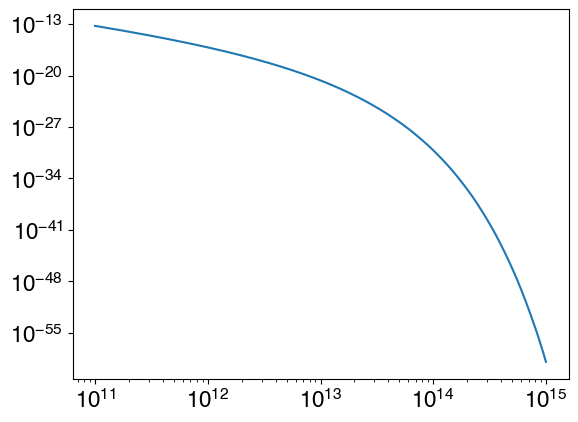

In [44]:
plt.plot(Masses,dndm)
plt.loglog()



In [45]:
# ccl.Cosmology(

In [46]:
# ccl.halos.MassFuncTinker08(

In [47]:



%%time
# hmfs = ccl.halos.MassFuncTinker08(cosmo,mass_def=hmd_200c)
hmfs = ccl.halos.MassFuncTinker08(cosmo,mass_def=hmd_200m)


CPU times: user 1.39 ms, sys: 373 µs, total: 1.76 ms
Wall time: 1.47 ms


In [50]:
# from pyccl import ccllib as lib

In [51]:
# a = .4
# logM = Masses
# status = 0
# cosmo.compute_sigma()
# sigM, status = lib.sigM_vec(cosmo.cosmo, a, logM,
#                             len(logM), status)
# sigM

In [52]:


# Array of redshifts
# z_arr = np.linspace(0.,1.,16)
nm = hmfs.get_mass_function(cosmo, Masses/cosmology['h'], 1./(1.+zp))

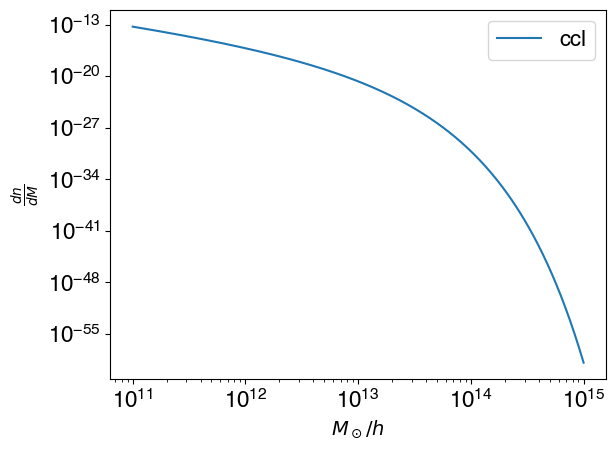

In [55]:
# Let's plot all of them at z=0
plt.figure()


plt.plot(Masses,
        nm/np.log(10)/cosmology['h']**3/Masses, label='ccl')
# plt.plot(Mhod,dndm_no_spline,c='k')
plt.loglog()
# plt.ylim([1E9,8.5E9])
plt.legend()
plt.xlabel(r'$M_\odot/h$', fontsize=14)
plt.ylabel(r'$\frac{dn}{dM}$',
           fontsize=14);

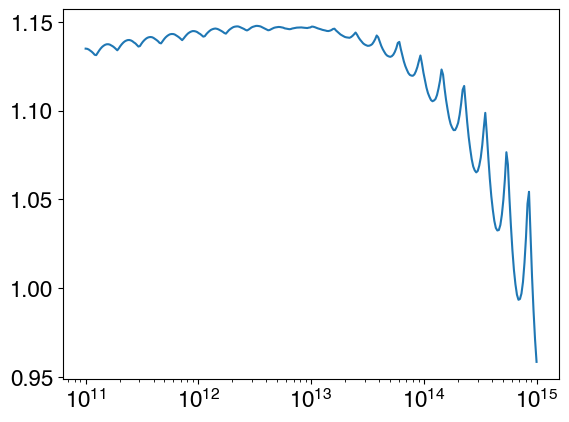

In [54]:
plt.plot(Masses,
         dndm/(nm/np.log(10)/cosmology['h']**3/Masses), label='ratio')
plt.xscale('log')